In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import copy
from scipy.linalg import svd
import random
from sklearn import preprocessing
import pickle
from scipy.optimize import fsolve
from scipy.special import gamma as g
from scipy.optimize import minimize
from _util import *

In [2]:
def transform_rating(mat):
    temp = 2 / (1+mat) - 1
    return logit(temp)

In [3]:
data = pd.read_csv('ratings.dat', sep='::', names = ["user_id","movie_id","rating","timestamp"]  , encoding='latin-1')

In [4]:
d = 10

In [19]:
L=3952
selected_movies = list(data.movie_id.value_counts()[data.movie_id.value_counts()>30].index)
selected_users = list(data[data.movie_id.isin(selected_movies)].user_id.value_counts().index[:])
selected_data=data[data.movie_id.isin(selected_movies)][data.user_id.isin(selected_users)]
len(selected_data)

989917

In [8]:

# learn \gamma and \phi from the training dataset
Y = logit((2/(1+W_train_mean)-1))
true_gamma1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)

theta_train = 1/(1+W_train_mean)
theta_train_mean = (logistic(np.dot(X,true_gamma1))+1)/2
true_phi1 = 1/fsolve(likelhood_beta, 1,args=(theta_train,theta_train_mean))[0] #1 is for starting 

# learn \gamma and \phi from the testing dataset
Y= logit((2/(1+W_test_mean)-1))
true_gamma2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)

theta_test = 1/(1+W_test_mean)
theta_test_mean = (logistic(np.dot(X,true_gamma2))+1)/2
true_phi2 = 1/fsolve(likelhood_beta, 1,args=(theta_test,theta_test_mean))[0]



NameError: name 'W_train_mean' is not defined

In [20]:
len(selected_movies)

2818

In [21]:
selected_movies = [a-1 for a in selected_movies]
selected_users = [a-1 for a in selected_users]

In [22]:
    num_users = 6040
    num_movies = 3952
    #W_feedback_matrix = np.zeros((num_users, num_movies))
    W_feedback_ratings = np.empty((num_users, num_movies))
    W_feedback_ratings[:] = np.nan
    W_feedback_ratings[np.array(data.user_id-1), np.array(data.movie_id-1)] = np.array(data.rating/5)
    #if data.rating[i] > 3:
        #W_feedback_matrix[data.user_id[i]-1, data.movie_id[i]-1] = 1
    # randomly permuting the users
    random.shuffle(selected_users)
    W_feedback_ratings = W_feedback_ratings[selected_users,:]
    W_feedback_ratings = W_feedback_ratings[:,selected_movies]
    W_train = W_feedback_ratings[0:num_movies//2,:]
    W_test = W_feedback_ratings[num_movies//2:,:]
    

In [23]:
np.nanmean(W_feedback_ratings,0)

array([0.8635, 0.8907, 0.8586, ..., 0.6065, 0.5742, 0.6968])

In [24]:
def meanvar_meanprex(mean, var):
    "mean-variance to precision"
    return 1/(mean*(1-mean)/var-1)

def logistic(x):
    return np.exp(x) / (np.exp(x) + 1)
def logit(x):
    return np.log(x/(1-x))
def likelhood_beta(psi,a,b):
    out = np.log(g(psi)/(g(b*psi)*g((1-b)*psi)))+(b*psi-1)*np.log(a)+((1-b)*psi-1)*np.log(1-a)
    return -np.sum(out)
from fancyimpute import MatrixFactorization

In [51]:
def feature_extraction(data, d, selected_movies, selected_users):
    num_users = 6040
    num_movies = 3952
    #W_feedback_matrix = np.zeros((num_users, num_movies))
    W_feedback_ratings = np.empty((num_users, num_movies))
    W_feedback_ratings[:] = np.nan
    W_feedback_ratings[np.array(data.user_id-1), np.array(data.movie_id-1)] = np.array(data.rating/5)
    #if data.rating[i] > 3:
        #W_feedback_matrix[data.user_id[i]-1, data.movie_id[i]-1] = 1
    # randomly permuting the users
    random.shuffle(selected_users)
    W_feedback_ratings = W_feedback_ratings[selected_users,:]
    W_feedback_ratings = W_feedback_ratings[:,selected_movies]
    W_train = W_feedback_ratings[0:num_movies//2,:]
    W_test = W_feedback_ratings[num_movies//2:,:]
    
    # collaborative filtering to learn features of movies from the training dataset
    W_train_softimpute = MatrixFactorization(rank=d,
            learning_rate=0.05,
            max_iters=50,
            shrinkage_value=0,
            min_value=None,
            max_value=None,
            verbose=True).fit_transform(W_train)
    U, s, VT = svd(W_train_softimpute)
    #W_train_d = np.matmul(np.matmul(U[:,:d],np.diag(s[:d])),VT[:d,:])
    X = movie_features = np.matmul(VT.T[:,:d],np.diag(s[:d]))
    #X = preprocessing.normalize(X, norm='l2')
    
    ## MNL utility estimates
    W_train_mean = np.nanmean(W_train, axis = 0) 
    W_test_mean = np.nanmean(W_test, axis = 0) 
    
    out = {#'W_train': W_train,
           #'W_test' : W_test,
           'W_train_mean': W_train_mean,
           'W_test_mean': W_test_mean,
           'movie_features':X,
    }
    return out
    
    

[MatrixFactorization] Iter 10: observed MAE=0.138850 rank=5
[MatrixFactorization] Iter 20: observed MAE=0.132165 rank=5
[MatrixFactorization] Iter 30: observed MAE=0.129429 rank=5
[MatrixFactorization] Iter 40: observed MAE=0.128169 rank=5
[MatrixFactorization] Iter 50: observed MAE=0.126981 rank=5
[MatrixFactorization] Iter 10: observed MAE=0.134194 rank=10
[MatrixFactorization] Iter 20: observed MAE=0.124334 rank=10
[MatrixFactorization] Iter 30: observed MAE=0.121079 rank=10
[MatrixFactorization] Iter 40: observed MAE=0.119360 rank=10
[MatrixFactorization] Iter 50: observed MAE=0.118206 rank=10
[MatrixFactorization] Iter 10: observed MAE=0.129972 rank=15
[MatrixFactorization] Iter 20: observed MAE=0.118193 rank=15
[MatrixFactorization] Iter 30: observed MAE=0.113838 rank=15
[MatrixFactorization] Iter 40: observed MAE=0.111786 rank=15
[MatrixFactorization] Iter 50: observed MAE=0.110318 rank=15
[MatrixFactorization] Iter 10: observed MAE=0.126735 rank=20
[MatrixFactorization] Iter 20

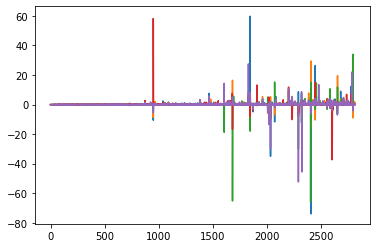

In [52]:
R2 = list()
for d in [5,10,15,20,30]:#,20,25,30,35]:
    out = feature_extraction(data, d, selected_movies, selected_users)
    dump(out, 'W_train_softimpute_back_{}'.format(d))
    
    X= out['movie_features']
    V = out['W_test_mean']
    theta = 1/(1+V)
    Y = logit(theta*2-1)
    gamma = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
    estimate = np.matmul(X,gamma)

    import pandas as pd
    explore = pd.DataFrame(X)
    explore['Y']=Y
    xxol = ['x'+str(i) for i in range(1,d+1)]
    explore.columns=xxol+['Y']
    explore['Y_hat'] = estimate
    explore['residual'] = (explore.Y_hat-explore.Y)/explore.Y
    explore.residual.plot()
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(explore.iloc[:,:5], explore['Y'])
    R2.append(reg.score(explore.iloc[:,:5], explore['Y']))

In [31]:
explore.residual.loc[:750].plot()

<AxesSubplot:>

In [42]:
explore.iloc[:,:5].isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

In [28]:
R2

[0.520035804450923, 0.6229462114932262, 0.6678631548615582]

[MatrixFactorization] Iter 10: observed MAE=0.132082 rank=10
[MatrixFactorization] Iter 20: observed MAE=0.123589 rank=10
[MatrixFactorization] Iter 30: observed MAE=0.119984 rank=10
[MatrixFactorization] Iter 40: observed MAE=0.118407 rank=10
[MatrixFactorization] Iter 50: observed MAE=0.117220 rank=10
[MatrixFactorization] Iter 10: observed MAE=0.129503 rank=15
[MatrixFactorization] Iter 20: observed MAE=0.117765 rank=15
[MatrixFactorization] Iter 30: observed MAE=0.113332 rank=15
[MatrixFactorization] Iter 40: observed MAE=0.111289 rank=15
[MatrixFactorization] Iter 50: observed MAE=0.109848 rank=15
[MatrixFactorization] Iter 10: observed MAE=0.125942 rank=20
[MatrixFactorization] Iter 20: observed MAE=0.112179 rank=20
[MatrixFactorization] Iter 30: observed MAE=0.107069 rank=20
[MatrixFactorization] Iter 40: observed MAE=0.104530 rank=20
[MatrixFactorization] Iter 50: observed MAE=0.102871 rank=20


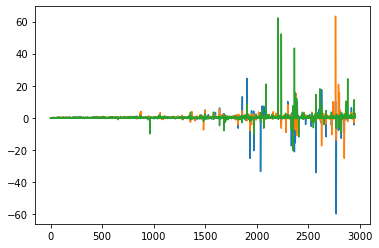

In [55]:
R2 = list()
for d in [5,10,15,20,30]:
    out = feature_extraction(data, d, selected_movies, selected_users)
    X= out['movie_features']
    V = out['W_test_mean']
    theta = 1/(1+V)
    Y = logit(theta*2-1)
    gamma = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
    estimate = np.matmul(X,gamma)

    import pandas as pd
    explore = pd.DataFrame(X)
    explore['Y']=Y
    xxol = ['x'+str(i) for i in range(1,d+1)]
    explore.columns=xxol+['Y']
    explore['Y_hat'] = estimate
    explore['residual'] = (explore.Y_hat-explore.Y)/explore.Y
    explore.residual.plot()
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(explore.iloc[:,:5], explore['Y'])
    R2.append(reg.score(explore.iloc[:,:5], explore['Y']))

In [37]:
W_train_softimpute = load('W_train_softimpute_back_{}'.format(d))

In [38]:
W_train_softimpute.keys()

dict_keys(['W_train_mean', 'W_test_mean', 'movie_features', 'true_gamma_wrt_test', 'true_phi_wrt_test', 'true_gamma_wrt_train', 'true_phi_wrt_train'])

In [53]:
def fit_best_gamma_phi(p, X, v):
    """ suppose we can see all v w/o error and in hindsight, find the best phi, gamma; for debug purpose"""
    import pymc3 as pm
    n_init = 2000
    n_tune = 200
    chains = 1
    n_sample = 2000

    with pm.Model() as Normal_Geom:
        gamma_temp = pm.MvNormal('gamma', mu=np.zeros(p), cov=np.identity(p),shape=p)
        phi = pm.Beta('phi', alpha= 1, beta=1, shape=1)
        alpha_temp = pm.math.dot(X, gamma_temp)
        mean_theta = (logistic(alpha_temp)+1)/2
        alpha_Beta, beta_Beta = beta_reparameterize(mean_theta, phi)
        theta = v_2_theta(v)
        theta = pm.Beta('theta', alpha= alpha_Beta, beta=beta_Beta, shape=L, observed = theta)
        trace = pm.sample(n_sample, tune = n_tune, chains = chains
                          , cores = 1, progressbar = 1, init='adapt_diag',
                          target_accept=0.95, trace = None);
    return {'gamma' : np.mean(trace["gamma"], 0), 'phi' : np.mean(trace["phi"], 0)}

In [56]:
for X_transform in ['standardize', 'l2','l2_then_standardize']:#['standardize', 'l2']:
    for with_intercept in [0, 1]:
        for d in [5,10,15,20,30]:
            #if X_transform in ['standardize', 'l2_then_standardize'] and with_intercept == 0:
            #    continue
            print('d = {}, X_transform = {}, with_intercept = {}'.format(d, X_transform, with_intercept))
            if d == 3:
                W_train_softimpute = load('MNL_real_dataset/W_train_softimpute_back_{}'.format(5))
            else:
                W_train_softimpute = load('W_train_softimpute_back_{}'.format(d))
            #U, s, VT = svd(W_train_softimpute)
            #W_train_d = np.matmul(np.matmul(U[:,:d],np.diag(s[:d])),VT[:d,:])
            X = movie_features = W_train_softimpute['movie_features']
            if X_transform == 'standardize':
                from sklearn.preprocessing import StandardScaler
                scaler = StandardScaler()
                scaler.fit(X)
                X = scaler.transform(X)
            elif X_transform == 'l2_then_standardize':
                X = preprocessing.normalize(X, norm='l2') 
                from sklearn.preprocessing import StandardScaler
                scaler = StandardScaler()
                scaler.fit(X)
                X = scaler.transform(X)
            else:
                X = preprocessing.normalize(X, norm='l2') 

            if with_intercept:
                X = sm.add_constant(X)
            v = W_train_softimpute['W_test_mean']
            y = v_2_y(v)
            results = fit_best_gamma_phi(X.shape[1], X, v)
            gamma = results['gamma']
            best_phi = results['phi'][0]
            y_mean = X.dot(gamma)
            v_y_mean = theta_2_v(y_2_theta(y_mean))
            v_y = theta_2_v(y_2_theta(y))

            print("fitting R2 = {:.2f}".format(r2_score(y, y_mean)))
            print("fitting R2 for v = {:.2f}".format(r2_score(v_y_mean, v_y)))

            n_train = 750
            results2 = fit_best_gamma_phi(X.shape[1], X[:n_train], v[:n_train]) 
            y1 = y[n_train:]
            y2 = X[n_train:].dot(results2['gamma'])
            print("prediction R2 = {:.2f}".format(r2_score(y1, y2)))
            v1 = theta_2_v(y_2_theta(y1))
            v2 = theta_2_v(y_2_theta(y2))
            print("prediction R2 for v = {:.2f}".format(r2_score(v1, v2)))

            print('max_para = {:.2f}'.format(max(abs(gamma))))
            print('best_phi = {:.2f}'.format(best_phi))

            out = {
                   'W_test_mean': v,
                   'movie_features':X,
                   'true_gamma_wrt_test': gamma,
                   'true_phi_wrt_test': best_phi,
            }

            fp = 'MNL_realdata_d_{}_X_transform_{}_with_intercept_{}'.format(d, X_transform, with_intercept)
            dump(out, fp)    
            print("\n")
            # _binary
        print("*" * 100)

d = 5, X_transform = standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 122 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.74
fitting R2 for v = -41.80


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 19 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -9.52
prediction R2 for v = -7.45
max_para = 0.21
best_phi = 0.09


d = 10, X_transform = standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 145 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.62
fitting R2 for v = -41.33


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 25 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -12.41
prediction R2 for v = -8.70
max_para = 0.21
best_phi = 0.09


d = 15, X_transform = standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 156 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.43
fitting R2 for v = -38.91


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 36 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -10.97
prediction R2 for v = -7.73
max_para = 0.22
best_phi = 0.09


d = 20, X_transform = standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 137 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.56
fitting R2 for v = -40.12


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 33 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -11.03
prediction R2 for v = -8.04
max_para = 0.21
best_phi = 0.09


d = 30, X_transform = standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 145 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.47
fitting R2 for v = -39.62


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 47 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -11.45
prediction R2 for v = -7.82
max_para = 0.21
best_phi = 0.09


****************************************************************************************************
d = 5, X_transform = standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 235 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.86
fitting R2 for v = 0.85


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 38 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.83
prediction R2 for v = 0.84
max_para = 1.40
best_phi = 0.00


d = 10, X_transform = standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 243 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.86
fitting R2 for v = 0.84


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 58 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.82
prediction R2 for v = 0.83
max_para = 1.41
best_phi = 0.00


d = 15, X_transform = standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 493 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.87
fitting R2 for v = 0.86


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 111 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.83
prediction R2 for v = 0.84
max_para = 1.40
best_phi = 0.00


d = 20, X_transform = standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 303 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.87
fitting R2 for v = 0.86


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 65 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.83
prediction R2 for v = 0.84
max_para = 1.40
best_phi = 0.00


d = 30, X_transform = standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 429 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.87
fitting R2 for v = 0.86


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 107 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.84
prediction R2 for v = 0.84
max_para = 1.40
best_phi = 0.00


****************************************************************************************************
d = 5, X_transform = l2, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 85 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.54
fitting R2 for v = 0.22


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 55 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.43
prediction R2 for v = 0.43
max_para = 3.33
best_phi = 0.00


d = 10, X_transform = l2, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 253 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.61
fitting R2 for v = 0.38


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 88 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.50
prediction R2 for v = 0.51
max_para = 3.39
best_phi = 0.00


d = 15, X_transform = l2, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 264 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.63
fitting R2 for v = 0.42


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 294 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.49
prediction R2 for v = 0.49
max_para = 3.54
best_phi = 0.00


d = 20, X_transform = l2, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 394 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.65
fitting R2 for v = 0.50


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 60 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.55
prediction R2 for v = 0.55
max_para = 3.78
best_phi = 0.00


d = 30, X_transform = l2, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 560 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.65
fitting R2 for v = 0.46


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 61 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.49
prediction R2 for v = 0.47
max_para = 3.95
best_phi = 0.00


****************************************************************************************************
d = 5, X_transform = l2, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 564 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.55
fitting R2 for v = 0.22


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 202 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.44
prediction R2 for v = 0.43
max_para = 3.23
best_phi = 0.00


d = 10, X_transform = l2, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 1057 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.61
fitting R2 for v = 0.38


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 378 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.51
prediction R2 for v = 0.51
max_para = 3.24
best_phi = 0.00


d = 15, X_transform = l2, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 1676 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.64
fitting R2 for v = 0.43


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 488 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.51
prediction R2 for v = 0.50
max_para = 4.20
best_phi = 0.00


d = 20, X_transform = l2, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 1769 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.66
fitting R2 for v = 0.51


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 747 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.55
prediction R2 for v = 0.55
max_para = 3.57
best_phi = 0.00


d = 30, X_transform = l2, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 2203 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.65
fitting R2 for v = 0.47


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 734 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.49
prediction R2 for v = 0.47
max_para = 3.91
best_phi = 0.00


****************************************************************************************************
d = 5, X_transform = l2_then_standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 144 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.94
fitting R2 for v = -64.43


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 12 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -11.81
prediction R2 for v = -7.38
max_para = 0.14
best_phi = 0.09


d = 10, X_transform = l2_then_standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 147 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.77
fitting R2 for v = -56.86


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 20 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -15.35
prediction R2 for v = -8.61
max_para = 0.14
best_phi = 0.09


d = 15, X_transform = l2_then_standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 120 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.57
fitting R2 for v = -51.91


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -12.73
prediction R2 for v = -7.97
max_para = 0.14
best_phi = 0.09


d = 20, X_transform = l2_then_standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 134 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.68
fitting R2 for v = -50.84


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 37 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -12.77
prediction R2 for v = -8.80
max_para = 0.14
best_phi = 0.09


d = 30, X_transform = l2_then_standardize, with_intercept = 0


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 130 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = -5.60
fitting R2 for v = -50.79


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 47 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = -12.93
prediction R2 for v = -8.95
max_para = 0.14
best_phi = 0.09


****************************************************************************************************
d = 5, X_transform = l2_then_standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 194 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.55
fitting R2 for v = 0.22


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 42 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.46
prediction R2 for v = 0.45
max_para = 1.37
best_phi = 0.00


d = 10, X_transform = l2_then_standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 262 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.61
fitting R2 for v = 0.38


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 80 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.51
prediction R2 for v = 0.51
max_para = 1.38
best_phi = 0.00


d = 15, X_transform = l2_then_standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 371 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.64
fitting R2 for v = 0.44


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 57 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.51
prediction R2 for v = 0.50
max_para = 1.37
best_phi = 0.00


d = 20, X_transform = l2_then_standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 368 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.66
fitting R2 for v = 0.52


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 77 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.55
prediction R2 for v = 0.55
max_para = 1.37
best_phi = 0.00


d = 30, X_transform = l2_then_standardize, with_intercept = 1


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 287 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


fitting R2 = 0.66
fitting R2 for v = 0.48


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [phi, gamma]


Sampling 1 chain for 200 tune and 2_000 draw iterations (200 + 2_000 draws total) took 79 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


prediction R2 = 0.47
prediction R2 for v = 0.45
max_para = 1.37
best_phi = 0.00


****************************************************************************************************


In [85]:
X= out['movie_features']
V = out['W_test_mean']
theta = 1/(1+V)
Y = logit(theta*2-1)
gamma = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
estimate = np.matmul(X,gamma)

import pandas as pd
explore = pd.DataFrame(X)
explore['Y']=Y
xxol = ['x'+str(i) for i in range(1,d+1)]
explore.columns=xxol+['Y']
explore['Y_hat'] = estimate
explore['residual'] = (explore.Y_hat-explore.Y)/explore.Y

In [86]:
explore.residual.plot()

In [87]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(explore.iloc[:,:5], explore['Y'])

In [88]:
R2 = reg.score(explore.iloc[:,:5], explore['Y'])
R2

0.47856897786039765

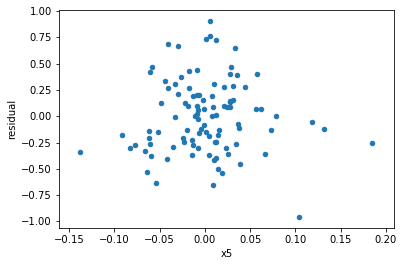

In [54]:
explore.plot(x='x5',y='residual',kind='scatter')

## Some analysis on how to get an appropriate \phi

In [100]:
np.nanmean(X_filled_softimpute, axis = 0)

array([0.84350875, 0.59006592, 0.59302115, ..., 0.71942559, 0.77606182,
       0.76473756])

(array([  7.,  34.,  83., 140., 228., 317., 396., 432., 286.,  83.]),
 array([0.29333333, 0.35521019, 0.41708705, 0.47896391, 0.54084076,
        0.60271762, 0.66459448, 0.72647134, 0.7883482 , 0.85022505,
        0.91210191]),
 <BarContainer object of 10 artists>)

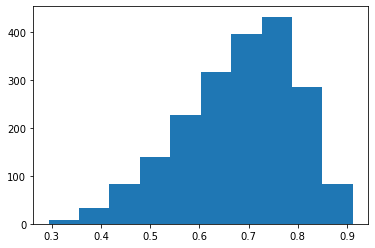

In [173]:
# from matrix_completion import svt_solve, calc_unobserved_rmse
# R_hat = svt_solve(W_feedback_ratings, np.isnan(W_feedback_ratings).astype(np.int))
# np.nanmean(W_test, axis = 0)

# np.nanmean(R_hat, axis = 0)
# W_feedback_ratings
a = W_feedback_ratings[:, np.sum(~np.isnan(W_feedback_ratings), 0)> 100]
plt.hist(np.nanmean(a, 0))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice


(array([ 39.,  63., 199., 329., 535., 845., 901., 630., 151.,  14.]),
 array([0.2 , 0.28, 0.36, 0.44, 0.52, 0.6 , 0.68, 0.76, 0.84, 0.92, 1.  ]),
 <BarContainer object of 10 artists>)

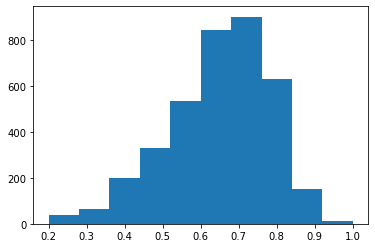

In [165]:
W_feedback_ratings = np.empty((num_users, num_movies))
W_feedback_ratings[:] = np.nan
W_feedback_ratings[np.array(data.user_id-1), np.array(data.movie_id-1)] = np.array(data.rating/5)
plt.hist(np.nanmean(W_feedback_ratings, 0))

In [116]:
num_users = 6040
num_movies = 3952
#W_feedback_matrix = np.zeros((num_users, num_movies))
W_feedback_ratings = np.empty((num_users, num_movies))
W_feedback_ratings[:] = np.nan
W_feedback_ratings[np.array(data.user_id-1), np.array(data.movie_id-1)] = np.array(data.rating/5)
#if data.rating[i] > 3:
    #W_feedback_matrix[data.user_id[i]-1, data.movie_id[i]-1] = 1
# randomly permuting the users
random.shuffle(selected_users)
W_feedback_ratings = W_feedback_ratings[selected_users,:]
W_feedback_ratings = W_feedback_ratings[:,selected_movies]
W_train = W_feedback_ratings[0:100,:]
W_test = W_feedback_ratings[100:,:]


In [118]:
# collaborative filtering to learn features of movies from the training dataset
U, s, VT = svd(W_train_softimpute)
#W_train_d = np.matmul(np.matmul(U[:,:d],np.diag(s[:d])),VT[:d,:])
movie_features = np.matmul(VT.T[:,:d],np.diag(s[:d]))


In [ ]:
W_test_mean

In [ ]:
# np.sum(np.isnan(Y))
# true_gamma1
# sample_var

1 / ((logistic(X.dot(true_gamma1)) + 1) / 2) - 1

In [157]:
plt.hist(W_test_mean)

(array([ 1.,  0.,  4.,  8., 12., 16., 15., 19., 14., 11.]),
 array([0.60252182, 0.63326839, 0.66401496, 0.69476153, 0.7255081 ,
        0.75625467, 0.78700124, 0.81774781, 0.84849438, 0.87924095,
        0.90998752]),
 <BarContainer object of 10 artists>)

In [158]:
W_test_est = (1 / ((logistic(X.dot(true_gamma1)) + 1) / 2) - 1)
plt.hist(W_test_mean - W_test_est)

(array([ 1.,  1.,  7., 11., 13., 11., 19., 14., 12., 11.]),
 array([-0.16832951, -0.14211859, -0.11590767, -0.08969676, -0.06348584,
        -0.03727492, -0.011064  ,  0.01514692,  0.04135784,  0.06756875,
         0.09377967]),
 <BarContainer object of 10 artists>)

In [160]:
Beta_mean = (logistic(X.dot(true_gamma1)) + 1) / 2
Beta_obs = 1 / (W_test_mean + 1)
a_very_rough_est_of_phi = meanvar_meanprex(Beta_mean, (Beta_mean - Beta_obs) ** 2)

In [161]:
plt.hist(Beta_mean)

(array([ 4., 20., 18., 20., 13.,  6.,  8.,  7.,  3.,  1.]),
 array([0.54301622, 0.5458325 , 0.54864879, 0.55146508, 0.55428136,
        0.55709765, 0.55991393, 0.56273022, 0.56554651, 0.56836279,
        0.57117908]),
 <BarContainer object of 10 artists>)

(array([ 1.,  0.,  2.,  8., 13., 14., 14., 23., 14., 11.]),
 array([-0.05931632, -0.05068127, -0.04204623, -0.03341118, -0.02477613,
        -0.01614109, -0.00750604,  0.00112901,  0.00976405,  0.0183991 ,
         0.02703414]),
 <BarContainer object of 10 artists>)

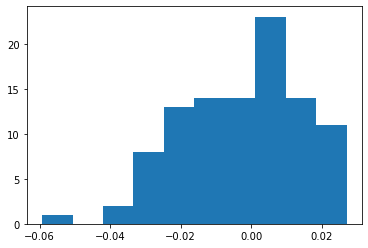

In [162]:
plt.hist(Beta_mean - Beta_obs)

In [156]:
# 1 / (+ 1)W_test_mean / 5 
# 1 / (np.random.randn(5) / 10 + 0.6 + 1)
# Beta_obs

In [144]:
1 / (np.random.randn(5) / 100 + 0.8 + 1)

array([0.55573496, 0.55902692, 0.55900445, 0.55646181, 0.55375491])

In [119]:
W_test_mean = np.nanmean(W_test, axis = 0) 


# learn \gamma and \phi from the testing dataset
X=movie_features
Y = logit((2/(1+W_test_mean)-1))
X = preprocessing.normalize(X, norm='l2')
true_gamma1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)

sample_var = np.var(1/(1+W_test), axis=0)
sample_phi = meanvar_meanprex(1/(1+W_test_mean),sample_var)
true_phi1 = sample_phi.mean()
true_phi1

nan

In [ ]:
W_train_mean = np.nanmean(W_train, axis = 0) 
W_test_mean = np.nanmean(W_test, axis = 0) 


# learn \gamma and \phi from the testing dataset
X=movie_features
Y = logit((2/(1+W_test_mean)-1))
X = preprocessing.normalize(X, norm='l2')
true_gamma1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)

sample_var = np.var(1/(1+W_test), axis=0)
sample_phi = meanvar_meanprex(1/(1+W_test_mean),sample_var)
true_phi1 = sample_phi.mean()

# learn \gamma and \phi from the training dataset
X=movie_features
Y= logit((2/(1+W_train_mean)-1))
X = preprocessing.normalize(X, norm='l2')
true_gamma2 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)

sample_var = np.var(1/(1+W_train), axis=0)
sample_phi = meanvar_meanprex(1/(1+W_train_mean),sample_var)
true_phi2 = sample_phi.mean()



In [51]:
d=5
out = feature_extraction(data, d, selected_movies, selected_users)
with open("Feature_Extraction_100.txt", "wb") as fp:
     pickle.dump(out, fp)

[MatrixFactorization] Iter 10: observed MAE=0.123563 rank=5
[MatrixFactorization] Iter 20: observed MAE=0.115308 rank=5
[MatrixFactorization] Iter 30: observed MAE=0.109627 rank=5
[MatrixFactorization] Iter 40: observed MAE=0.106599 rank=5
[MatrixFactorization] Iter 50: observed MAE=0.103871 rank=5


In [59]:
out['true_phi_wrt_train']

1.9830074563541176

In [ ]:
with open("Feature_Extraction_100.txt", "wb") as fp:
     pickle.dump(out, fp)

In [ ]:
(1/(1+out['W_train'])).max()

In [ ]:
out['true_phi_wrt_test']

In [ ]:
obs = pd.DataFrame(out['W_test'],columns=selected_movies)

In [ ]:
obs.iloc[:,1].hist()

In [ ]:
obs.iloc[:,-1].hist()

In [ ]:
obs.iloc[:,-1]